# Non-linear least Squares Fitting in Ecology and Evolution <a class="tocSkip">

<div id="toc"> </div>

## Introduction and preliminaries

This chapter assumes that you have already seen the [NLLS lecture](https://github.com/mhasoba/TheMulQuaBio/blob/master/Lectures/NLLS/Pawar_NLLS.pdf).  

*A Video link will also appear here once the 2018 NLLS lecture has been delivered* 

We will work with several NLLS examples here.

> *You should build a separate R scripts for each of these examples using the principles of good coding you learnt in the R week*. In particular, create separate `code`, `data`, `results` directories, and `setwd()` to `code`.   
>
> For example, for the Allometry example below, create a new R script file called `Allometry_nlls.R` and save it to your `code` directory. Then build your script for tackling this particular example in that file.    


You may work in RStudio or any other Code editor you prefer.

You will need the `nls.lm` R package, which you can install using the standard method (linux users, launch R in `sudo` mode first):

```r
> install.packages("minpack.lm") 
```

Now, load the necessary packages, and clear all variables and graphic devices:

In [1]:
rm(list = ls())
graphics.off()

library("minpack.lm") # for Levenberg-Marquardt nls fitting
library("ggplot2")

*You will need to repeat these commands at the start of every new nlls script file you develop below.*

### Why use the nls.lm package?

The standard NLLS function in R, cals `nls` uses a less robust algorithm called the Gauss-Newton algorithm. Therefore, `nls` will often fail to fit your model to the data if you start off at starting values for the parameters that are too far from what the optimal vaues would be, especially if the "parameter space" is weirdly shaped, i.e., the model has a mathematical form that makes it hard to find parameter combinations that minimize the NLLS. If this does not makes ense, don't worry about it- just go with `nls_LM` from the `nls.lm` package instead of `nls`! If you are really curious, try substituting `nls` for `nls_LM` in the examples below and compare the results.  

## Allometric scaling

Let's start with a common and reasonably simple example from biology: __[allometric scaling](https://en.wikipedia.org/wiki/Allometry)__. We will look at allometric scaling of body weight vs. wing length in dragonflies and damselfiles. 

Allometric relationships take the form:

$$y = a x^a$$

where $x$ and $y$ are morphological measures, the constant is the value of $y$ at $x = 1$, and $a$ is the scaling "exponent". This is also called a power-law, because $y$ relates to $x$ through a simple power.   

First create a function object for the power law model:

In [2]:
powMod <- function(x, a, b) {
    return(a * x^b)
}

Now read in the data:

In [3]:
MyData <- read.csv("../Data/GenomeSize.csv")

head(MyData)

Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


[Anisoptera](https://en.wikipedia.org/wiki/Dragonfly) are dragonflies, and [Zygoptera](https://en.wikipedia.org/wiki/Damselfly) are Damselflies. Let's use the Draginflies data subset. 

Subset the data accordingly and remove NAs:

In [4]:
Data2Fit <- subset(MyData,Suborder == "Anisoptera")

Data2Fit <- Data2Fit[!is.na(Data2Fit$TotalLength),] # remove NA's

Plot it:

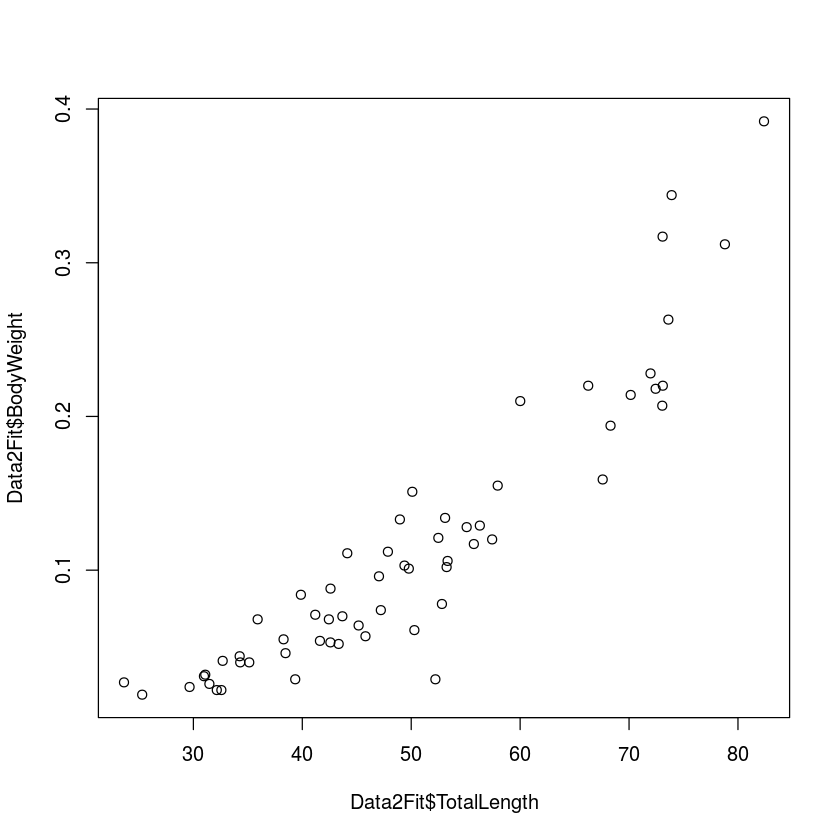

In [5]:
plot(Data2Fit$TotalLength, Data2Fit$BodyWeight)

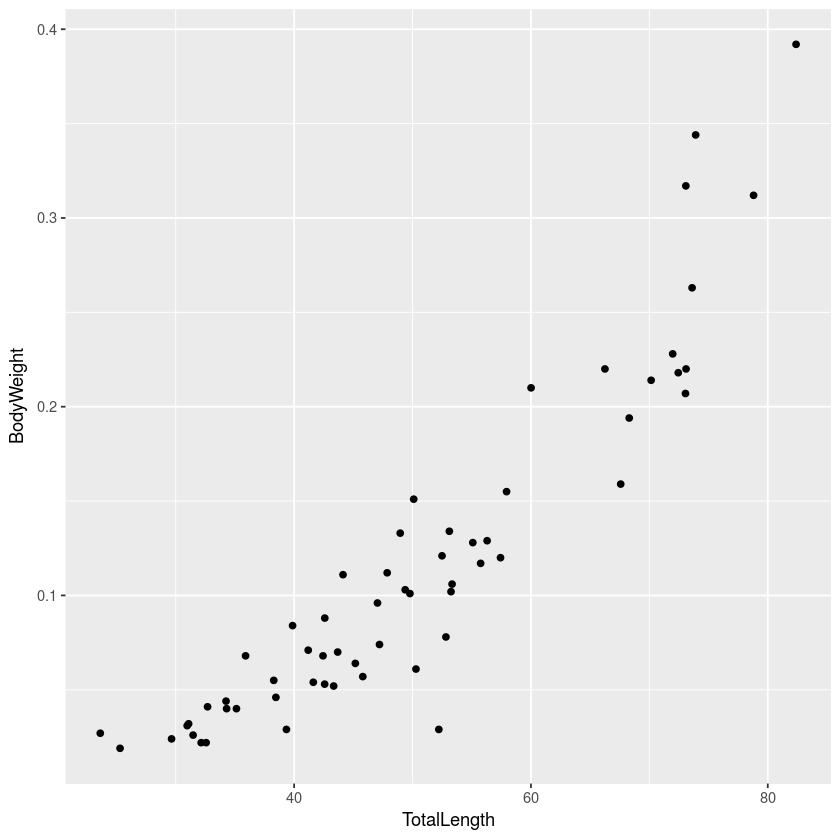

In [6]:
ggplot(Data2Fit, aes(x = TotalLength, y = BodyWeight)) + geom_point() # or using ggplot!

Now fit the model to the data using NLLS:

In [7]:
PowFit <- nlsLM(BodyWeight ~ powMod(TotalLength, a, b), data = Data2Fit, start = list(a = .1, b = .1))

We can use `summary()` just like we would for a `lm()` fit object. 

In [8]:
summary(PowFit)


Formula: BodyWeight ~ powMod(TotalLength, a, b)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 3.941e-06  2.234e-06   1.764    0.083 .  
b 2.585e+00  1.348e-01  19.174   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02807 on 58 degrees of freedom

Number of iterations to convergence: 39 
Achieved convergence tolerance: 1.49e-08


Now let's visualize the fit. For this, first we need to generate a vector of body lengths (the x-axis variable) for plotting: 

In [9]:
Lengths <- seq(min(Data2Fit$TotalLength),max(Data2Fit$TotalLength),len=200)

Next, calculate the predicted line. For this, we will need to extract the coefficient from the model fit object using the `coef()`command. 

In [10]:
coef(PowFit)["a"]
coef(PowFit)["b"]

a 
3.940685e-06

b 
2.585048

So, we can do the following:

In [11]:
Predic2PlotPow <- powMod(Lengths,coef(PowFit)["a"],coef(PowFit)["b"])

Now plot the data and the fitted model line:

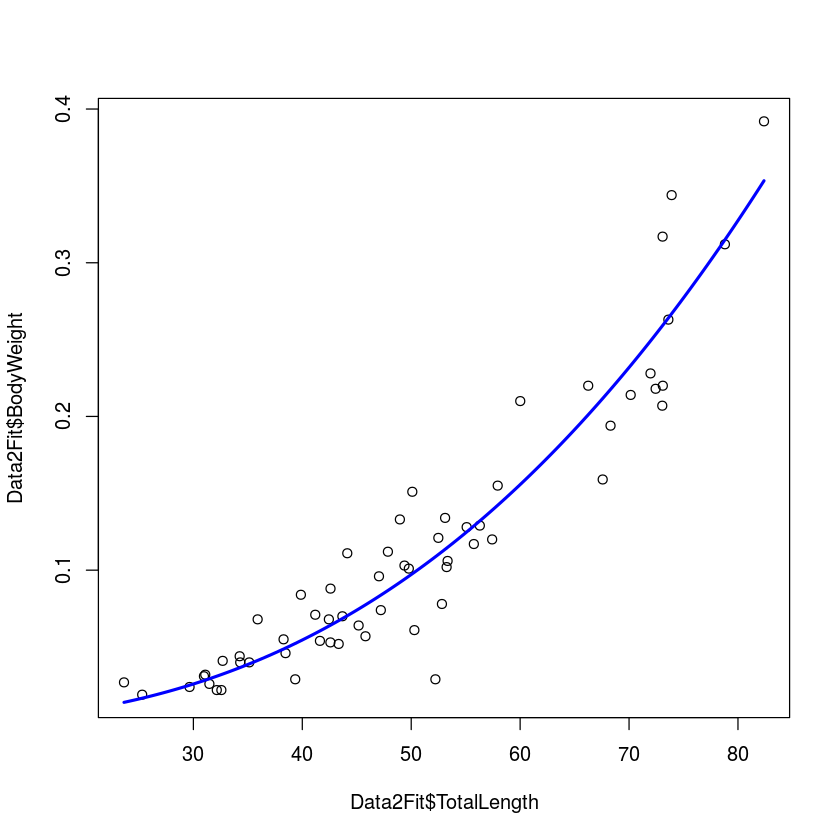

In [12]:
plot(Data2Fit$TotalLength, Data2Fit$BodyWeight)
lines(Lengths, Predic2PlotPow, col = 'blue', lwd = 2.5)
Predic2PlotPow <- powMod(Lengths,coef(PowFit)["a"],coef(PowFit)["b"])

Now plot the fitted (estimated) line on top of the data:

We can claculate the confidence intervals on the estimated parameters as we would in OLS fitting used for Linear Models: 

In [13]:
confint(PowFit)

Waiting for profiling to be done...


,2.5%,97.5%
a,1.171935e-06,1.205273e-05
b,2.318292e+00,2.872287e+00


#### Exercises

a. Make the same plot as above, fitted line and all, in `ggplot`

b. Add (display) the equation you estimated to your new (ggplot) plot. The equation is: $\text{Weight} = 3.94 \times 10^{-06} \times \text{Length}^{2.59}$

c. Try playing with the starting values, and see if you can "break" the model fit -- that is the NLLS fitting does not converge on a solution.

d. Repeat the model fitting (incuding 1-3 above) using the Zygoptera data subset.

### Comparing two models

Let's compare the model with an alternative one fitted to the same data. Let's try fitting a quadratic curve of the form:

$$y = a + b x + c x^2$$

This is a linear model, which you can fit using `lm()`:   

In [14]:
QuaFit <- lm(BodyWeight ~ poly(TotalLength,2), data = Data2Fit)

And like before, we obtain the predicted values (but this time using the `predict.lm` function):

In [15]:
Predic2PlotQua <- predict.lm(QuaFit, data.frame(TotalLength = Lengths))

Now let's plot the two fitted models together:

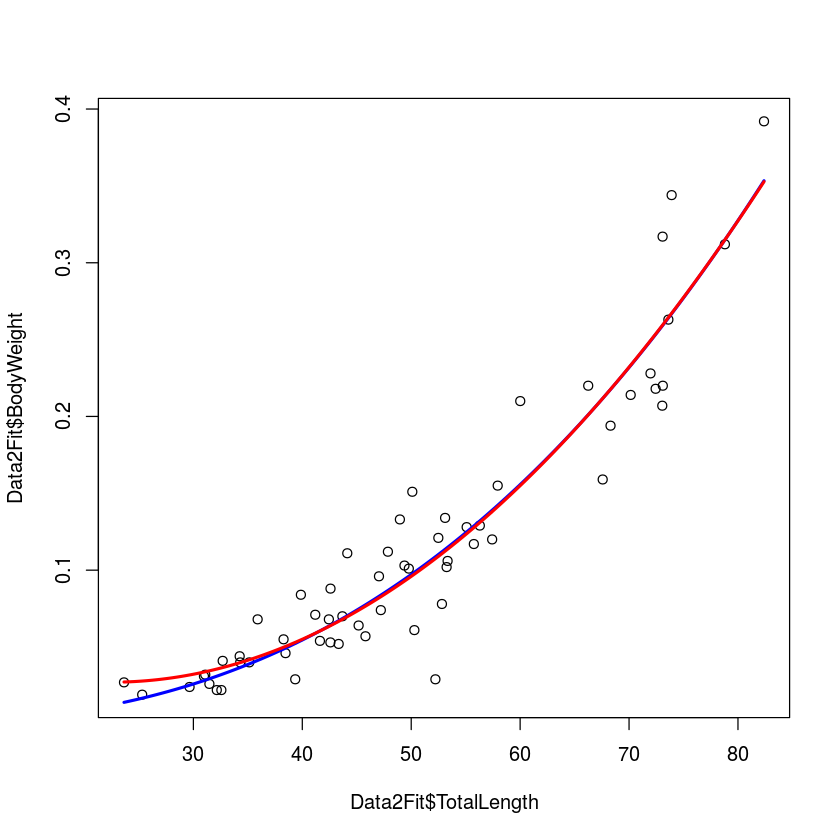

In [16]:
plot(Data2Fit$TotalLength, Data2Fit$BodyWeight)
lines(Lengths, Predic2PlotPow, col = 'blue', lwd = 2.5)
lines(Lengths, Predic2PlotQua, col = 'red', lwd = 2.5)

Very similar fits, except that the quadratic model seems to get it wrong at the lower end of the data range. Let's do a proper/formal model comparison now to check which model better-fits the data.

Let's first calculate the R$^2$ values of the two fitted models:

In [17]:
RSS_Pow <- sum(residuals(PowFit)^2)  # Residual sum of squares
TSS_Pow <- sum((Data2Fit$BodyWeight - mean(Data2Fit$BodyWeight))^2)  # Total sum of squares
RSq_Pow <- 1 - (RSS_Pow/TSS_Pow)  # R-squared value

RSS_Qua <- sum(residuals(QuaFit)^2)  # Residual sum of squares
TSS_Qua <- sum((Data2Fit$BodyWeight - mean(Data2Fit$BodyWeight))^2)  # Total sum of squares
RSq_Qua <- 1 - (RSS_Qua/TSS_Qua)  # R-squared value

RSq_Pow 
RSq_Qua

[1] 0.9005475

[1] 0.9003029

Not very useful. In general, R$^2$ is a good measure of model fit, but cannot be used for model selection -- epecially not here, given the tiby difference in the R$^2$'s.

Instead, as discussed in the lecture, we can use the Akaike Information Criterion (AIC):

In [18]:
n <- nrow(Data2Fit) #set sample size
kPow <- length(coef(PowFit)) # get number of parameters in power law model
kQua <- length(coef(QuaFit)) # get number of parameters in quadratic model

AIC_Pow <- n * log((2 * pi) / n) + n + 2 + n * log(RSS_Pow) + 2 * kPow
AIC_Qua <- n * log((2 * pi) / n) + n + 2 + n * log(RSS_Qua) + 2 * kQua
AIC_Pow - AIC_Qua

[1] -2.147426

Of course, as you might have suspected, we can do this using an in-built function in R! 

In [19]:
AIC(PowFit) - AIC(QuaFit)

[1] -2.147426

*So which model wins?* As we had dicussed in the NLLS lecture, a rule of thumb is that a AIC value difference (typically denoted as $\Delta$AIC) > 2 is a acceptable cutoff for calling a winner. So the power law (allometric model) is a better fit here. Read the [Johnson & Omland paper](https://github.com/mhasoba/TheMulQuaBio/blob/master/Readings/Modelling/JohnsonOmland2004.pdf) for more on model selection in Ecology and Evolution.    

#### Exercises

a. Calculate the Bayesian Information Criterion (BIC), also know as the Schwarz Criterion (see your Lecture notes and the [Johnson & Omland paper](https://github.com/mhasoba/TheMulQuaBio/blob/master/Readings/Modelling/JohnsonOmland2004.pdf), and use $\Delta$BIC to select the better fitting model. 

b. Fit a straight line the same data and compare with the allometric and quadratic models.

c. Repeat the model comparison (incuding 1-2 above) using the Zygoptera data subset -- does the allometric mdoel still win?

### Fitting growth rate models

Let's up the ante and tacke a more complicated NLLS problem - Fitting population growth rates to data. In general, a population grows exponentially while its abundance is low (and resources are efefctively not limiting, and then this growth slows and eventually stops as resources become limiting. There may also be a time lag before the population growth really takes off.

We will work with some Bacterial growth data that Tom Smith, a PhD student at Silwood, has been generating as part of his Dissertation researach.  Bacterial growth in batch culture follows a distinct set of phases; lag phase, exponential phase and stationary phase. During the lag phase a suite of transcriptional machinery is activated, including genes involved in nutrient uptake and metabolic changes, as bacteria prepare for growth. During the exponential growth phase, bacteria divide at a constant rate, the population doubling with each generation. When the carrying capacity of the media is reached, growth slows and the number of cells in the culture stabilises, beginning the stationary phase.

Traditionally, growth rate can be measured by plotting out cell numbers or culture density against time on a semi-log graph and fitting a straight line through the exponential growth phase - the slope of the line gives the maximum growth rate ($r_{max}$). Models have since been devised which we can use to describe the whole sigmoidal bacterial growth curve. 

Let's first generate some "data" on the number of bacterial cells as a function of time taht we can play with:

In [20]:
time <- c(0, 2, 4, 6, 8, 10, 12, 16, 20, 24) # timepoints (in hours maybe?)
log_cells <- c(3.62, 3.62, 3.63, 4.14, 5.23, 6.27, 7.57, 8.38, 8.70, 8.69) # logged cell counts - more on this below

data <- data.frame(time, log_cells) + rnorm(length(time),sd=.1)
# add some random error
names(data) <- c("t", "LogN")

We have added a vector of normally distributed errors to emulate random "sampling errors". Note also that the the assumption of normality of these errors underlies the statistical analyses of Ordinary NLLS fits just as it underies Ordinary Least Squares (your standard linear modelling).

Plot the data:

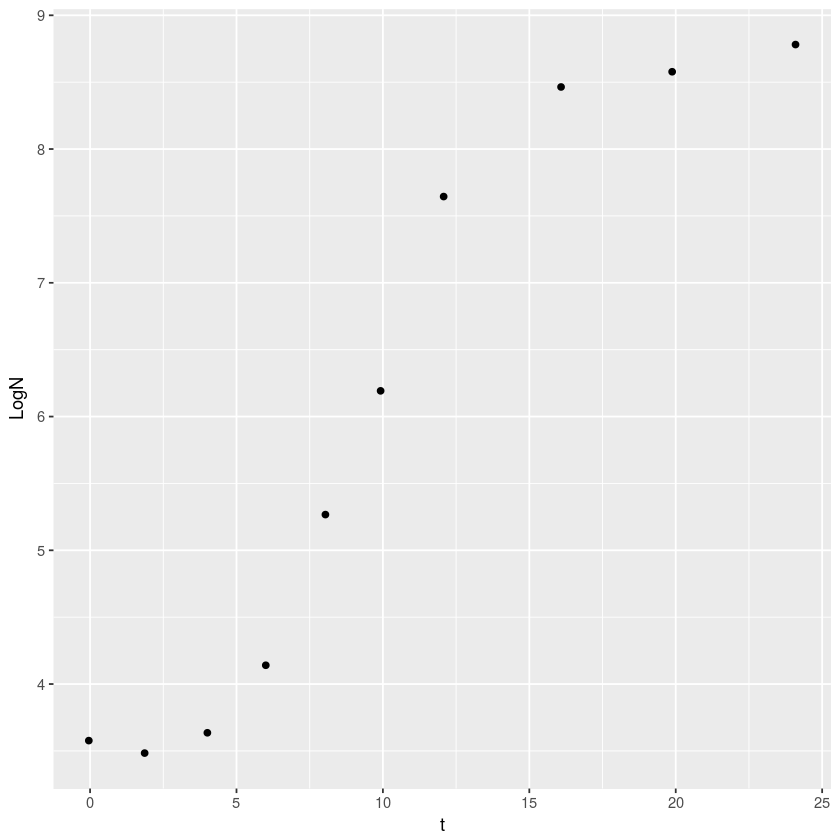

In [21]:
ggplot(data, aes(x = t, y = LogN)) + geom_point()

We will fit three growth models, all of which are known to fit such population growth data, especially in microbes. These are a modified Gompertz model (Zwietering et. al., 1990), the Baranyi model (Baranyi, 1993) and the Buchanan model (or three-phase logistic model; Buchanan, 1997). Given a set of cell numbers (N) and times (t), each growth model can be described in terms of:
\begin{itemize} 
\item $N_0$:  Initial cell culture (Population) density (number of cells per unit volume)  
\item $N_{max}$: Maximum culture density (aka "carrying capacity") 
\item $r_{max}$: Maximum growth rate 
\item $t_{lag}$: Duration of the lag phase before the population starts growing exponentially
 \end{itemize}
   
First let's specify the model functions:

In [22]:
baranyi_model <- function(t, r_max, N_max, N_0, t_lag){  # Baranyi model (Baranyi 1993)
return(N_max + log10((-1+exp(r_max*t_lag) + exp(r_max*t))/(exp(r_max*t) - 1 + exp(r_max*t_lag) * 10^(N_max-N_0))))
}


buchanan_model <- function(t, r_max, N_max, N_0, t_lag){ # Buchanan model - three phase logistic (buchanan 1997)
  return(N_0 + (t >= t_lag) * (t <= (t_lag + (N_max - N_0) * log(10)/r_max)) * r_max * (t - t_lag)/log(10) +
           (t >= t_lag) * (t > (t_lag + (N_max - N_0) * log(10)/r_max)) * (N_max - N_0))
}


gompertz_model <- function(t, r_max, N_max, N_0, t_lag){  # Modified gompertz growth model (Zwietering 1990)
  return(N_0 + (N_max - N_0) * exp(-exp(r_max * exp(1) * (t_lag - t)/((N_max - N_0) * log(10)) + 1)))
}


It is important to note that we have written the funcions in log (to the base 10 - can also be base 2 or natural log) scale. This is because NLLS fitting often converges better in log scale. The interpretation of each of the the estimated/fitted paramters does not change if we take a log of the model's equation.    

Now let's generate some starting values for the NLLS fitting. We did not pay much attention to what starting values we used in the above example on fitting an allometric model because the power-law model is easy to fit using NLLS, and starting far from the optimal parameters does not matter too much. Here, we derive the starting values by using the actual data:  

In [23]:
N_0_start <- min(data$LogN)
N_max_start <- max(data$LogN)
t_lag_start <- data$t[which.max(diff(diff(data$LogN)))]
r_max_start <- max(diff(data$LogN))/mean(diff(data$t))

Now fit the models:

In [24]:
fit_baranyi <- nlsLM(LogN ~ baranyi_model(t = t, r_max, N_max, N_0, t_lag), data,
              list(t_lag=t_lag_start, r_max=r_max_start, N_0 = N_0_start, N_max = N_max_start))


fit_buchanan <- nlsLM(LogN ~ buchanan_model(t = t, r_max, N_max, N_0, t_lag), data,
                        list(t_lag=t_lag_start, r_max=r_max_start, N_0 = N_0_start, N_max = N_max_start))

fit_gompertz <- nlsLM(LogN ~ gompertz_model(t = t, r_max, N_max, N_0, t_lag), data,
                      list(t_lag=t_lag_start, r_max=r_max_start, N_0 = N_0_start, N_max = N_max_start))

Warning message in baranyi_model(t = t, r_max, N_max, N_0, t_lag):
“NaNs produced”

Get the model summaries:

In [25]:
summary(fit_baranyi)
summary(fit_buchanan)
summary(fit_gompertz)


Formula: LogN ~ baranyi_model(t = t, r_max, N_max, N_0, t_lag)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
t_lag  5.21613    0.28821   18.10 1.83e-06 ***
r_max  1.36296    0.06977   19.54 1.17e-06 ***
N_0    3.53900    0.07135   49.60 4.50e-09 ***
N_max  8.61811    0.06731  128.03 1.53e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1147 on 6 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 1.49e-08



Formula: LogN ~ buchanan_model(t = t, r_max, N_max, N_0, t_lag)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
t_lag  5.06703    0.25306   20.02 1.01e-06 ***
r_max  1.31179    0.06349   20.66 8.37e-07 ***
N_0    3.56557    0.07160   49.80 4.40e-09 ***
N_max  8.60761    0.07160  120.21 2.23e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.124 on 6 degrees of freedom

Number of iterations to convergence: 10 
Achieved convergence tolerance: 1.49e-08



Formula: LogN ~ gompertz_model(t = t, r_max, N_max, N_0, t_lag)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
t_lag  5.48894    0.31439   17.46 2.26e-06 ***
r_max  1.50130    0.10185   14.74 6.13e-06 ***
N_0    3.55549    0.08183   43.45 9.95e-09 ***
N_max  8.79057    0.10024   87.70 1.48e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1332 on 6 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 1.49e-08


And see how the fits look:

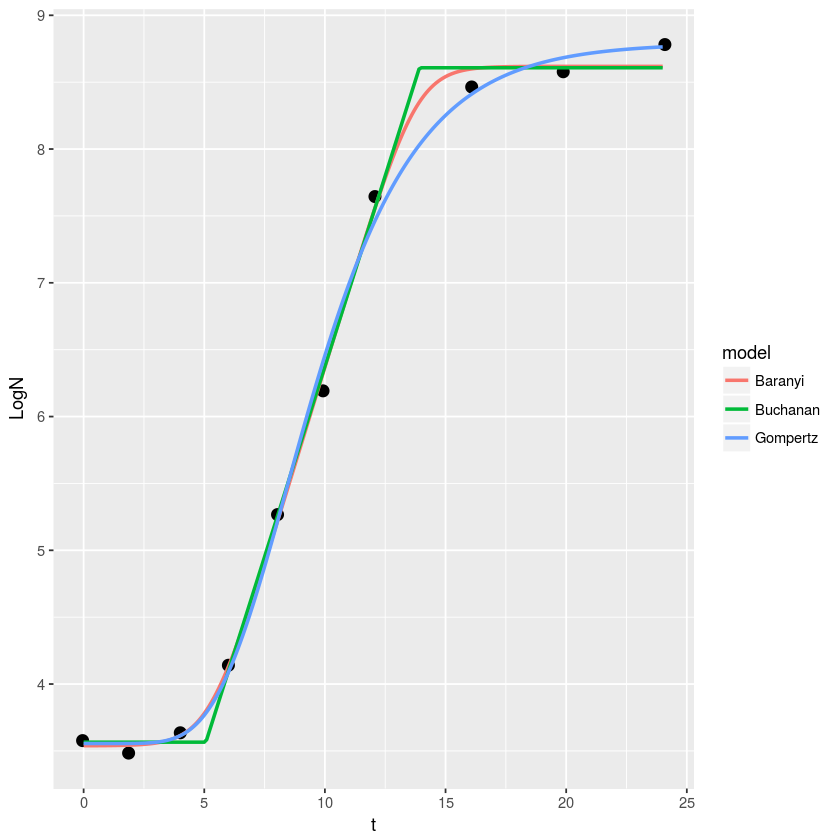

In [26]:
timepoints <- seq(0, 24, 0.1)
baranyi_points <- baranyi_model(t = timepoints, r_max = coef(fit_baranyi)["r_max"], N_max = coef(fit_baranyi)["N_max"],
                                N_0 = coef(fit_baranyi)["N_0"], t_lag = coef(fit_baranyi)["t_lag"])
buchanan_points <- buchanan_model(t = timepoints, r_max = coef(fit_buchanan)["r_max"], N_max = coef(fit_buchanan)["N_max"],
                                N_0 = coef(fit_buchanan)["N_0"], t_lag = coef(fit_buchanan)["t_lag"])
gompertz_points <- gompertz_model(t = timepoints, r_max = coef(fit_gompertz)["r_max"], N_max = coef(fit_gompertz)["N_max"],
                                N_0 = coef(fit_gompertz)["N_0"], t_lag = coef(fit_gompertz)["t_lag"])

df1 <- data.frame(timepoints, baranyi_points)
df1$model <- "Baranyi"
names(df1) <- c("t", "LogN", "model")

df2 <- data.frame(timepoints, buchanan_points)
df2$model <- "Buchanan"
names(df2) <- c("t", "LogN", "model")

df3 <- data.frame(timepoints, gompertz_points)
df3$model <- "Gompertz"
names(df3) <- c("t", "LogN", "model")

model_frame <- rbind(df1, df2, df3)

ggplot(data, aes(x = t, y = LogN)) +
  geom_point(size = 3) +
  geom_line(data = model_frame, aes(x = t, y = LogN, col = model), size = 1)

#### Exercises

a. Calculate the confidence intervals on the parameters of each of the three fitted models, and use model selection (using AIC and/or BIC) as you did before to find the best-fitting model of the three

b. Repeat the model comparison exercise 1000 times (You will have to write a loop), and determine whether one model gerally wins more often than the others. Note that each rub will generate a slightly different dataset, because we are adding a vector of random errors every time the "data" are generated.

c. Repeat (2), but increase the error by increasing the standard deviation of the normal error distributon, and see if there are differences in the robustness of the models to sampling/experimental errors. You may also want to try chaning the distribution of the errors to some non-normal distribtion as see what happens.

d. Fit some real data to these models! Import the [following dataset on bacterial growth rates](https://github.com/mhasoba/TheMulQuaBio/blob/master/Data/example_growth_data.csv) into R: 

In [27]:
BacData <- read.csv("../Data/example_growth_data.csv")

head(BacData)
tail(BacData)

ID,bacterial_genus,replicate,trait_name,trait_value,hour
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),5.301030,0
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),5.301030,5
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),6.991226,10
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),8.094820,15
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),8.358316,20
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),8.460296,25


,ID,bacterial_genus,replicate,trait_name,trait_value,hour
963,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.086360,25
964,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.322219,30
965,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.361728,35
966,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.322219,40
967,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.260071,45
968,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.292256,50


The column `trait_value` and `hour` are your variables of interest (log cell density and time), respectively. Note that the `ID` column will tell you which rows represent one separate growth experiment.  Make sure you have a good look at the data first by plotting them up (idealy, in a loop).  

That is the end of this NLLS tutorial. Hope you found it useful, and that it gives you a toe-hold for learning how to fit non-linear models to your own data. 

Also, note that similar to linear models, you can use Non-linear Mixed Effects statistical methods to fit nonlinear models to data (e.g., using the `lme4` and/or `nlme` packages in R).  

## Readings and Resources <a id='Readings'></a>

* Motulsky, Harvey, and Arthur Christopoulos. Fitting models to biological data using linear and nonlinear regression: a practical guide to curve fitting. OUP USA, 2004.
* Johnson, J. B. & Omland, K. S. 2004 Model selection in ecology and evolution. Trends Ecol. Evol. 19, 101–108.
* The [NCEAS non-linear modelling working group](https://groups.nceas.ucsb.edu/non-linear-modeling/projects/OrangeTree)
* [Mixed-Effects Models in S and S-PLUS](https://link.springer.com/book/10.1007/b98882)